process an image in notebook  

using new code in `fringeprocess.py`
- `fringeprocess.circle_mask_pklist`
- `fringeprocess.gauge_initial_column`

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder

In [13]:
from plot_helpers import draw_gauge

In [14]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
img_filename = image_folder / 'g1.bmp'

In [15]:
img = Image.open(img_filename)
img.convert("L")
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [16]:
xygb = np.array([[ 146., 180.],
       [931., 180.,],
       [931., 946.]])

In [49]:
# without circle mask
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)
ffrac

np.float64(0.41637310852472975)

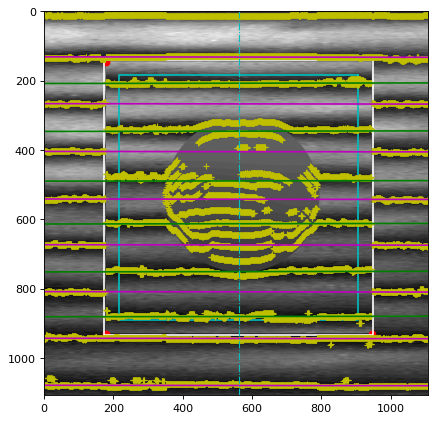

In [50]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
draw_gauge(axes, img_array, drawdata)

In [51]:
# with circle mask
circle = (330, 290, 820, 780)
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True, circle=circle )
ffrac

np.float64(0.48371066408392693)

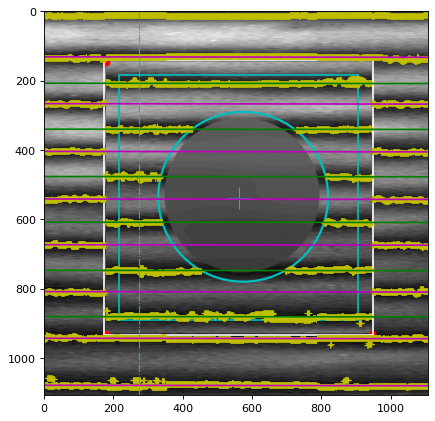

In [52]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
draw_gauge(axes, img_array, drawdata)